# Natural Language Processing 2 - Text Classification with Recurrent Neural Networks.ipynb

In [1]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 What is a Recurrent Neural Network (RNN)

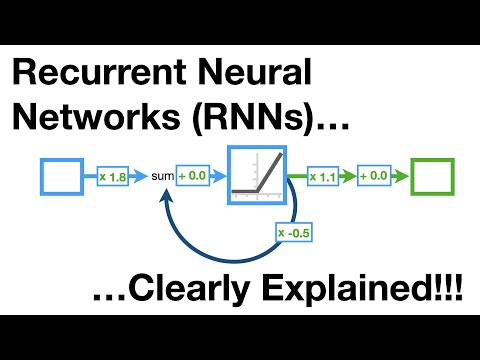

In [2]:
YouTubeVideo("AsNTP8Kwu80", width=800, height=500)

### 1.1 Definition of an RNN

A recurrent neural network (RNN) is a type of artificial neural network that is designed to process **sequential data**. Unlike feedforward neural networks, which process data inputs in a single pass, recurrent neural networks are able to process inputs in a recursive manner, by maintaining a **state** or **memory** of previous inputs.

RNNs are particularly useful for natural language processing (NLP) and speech recognition tasks, where the sequence of input data is important. The network is able to learn patterns in the sequence and use that information to make predictions or classifications. Some tasks where RNNs excel at are as follows:

1. Language Modeling: predicting the likelihood of a sequence of words in a language.

2. Speech Recognition: converting spoken words to written text.

3. Machine Translation: translating text from one language to another.

4. Sentiment Analysis: determining the sentiment (positive, negative or neutral) of a text.

5. Time Series Analysis: forecasting future values of a time series based on past observations.

6. Image Captioning: generating natural language descriptions of images.

7. Handwriting Recognition: converting handwritten text to machine-readable text.

8. Music Generation: generating new music sequences based on existing ones.

9. Video Analysis: recognizing actions and objects in videos.

10. Chatbot Development: generating responses to user queries in a conversational interface.

In other words, every problem that deals with data arranged sequentially, where the order of the sequence contains additional information about the data.

In an RNN, each node or neuron in the network receives an input and produces an output, which is sent to the next node in the sequence. The output of each node is also **fed back** into the network as an input to the next node, allowing the network to remember previous inputs and produce context-sensitive outputs.

### 1.2 How does an RNN learn? The "backpropagation through time" algorithm

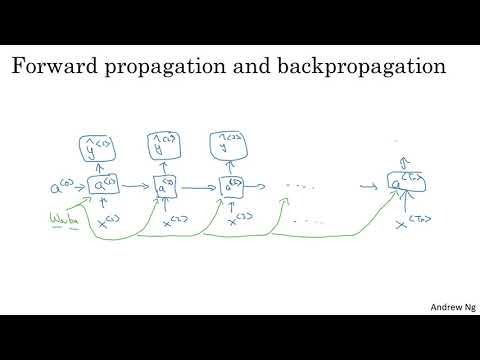

In [ ]:
YouTubeVideo("PmdRoZStPFM", width=800, height=500)

Backpropagation through time (BPTT) is a learning algorithm used in Recurrent Neural Networks (RNNs) to train the network by backpropagating errors through time.

In BPTT, the RNN is **unrolled in time**, creating a sequence of connected neural networks, where each network represents a time step. The output of each network is used as input to the next network, allowing the network to maintain a memory of past inputs.

During the forward pass, the input sequence is fed into the network, and the output sequence is computed. During the backward pass, the error in the output sequence is calculated and backpropagated through time to update the weights of the network.

The backpropagation algorithm computes the gradient of the error with respect to the weights of the network, allowing the weights to be updated to minimize the error. The weights are updated in the direction of the negative gradient of the error, with the learning rate controlling the step size of the update.

BPTT is a powerful algorithm for training RNNs, but it can suffer from the vanishing gradient problem, where the gradients become very small or disappear as they are propagated through the network. This can make it difficult for the network to learn long-term dependencies. To address this problem, techniques such as **gradient clipping** and **Long Short-Term Memory (LSTM)** networks have been developed.

### 1.3 Addressing the "vanishing gradient" problem with long sequences - the "Long Short-Term Memory (LSTM)" network

The following video is an *optional* deep-dive into how LSTM networks work. TensorFlow takes care of the working of an LSTM under the hood, so you don't need to know the specifics. You just need to know how to apply an LSTM network to a sequential time-series or natural language problem.

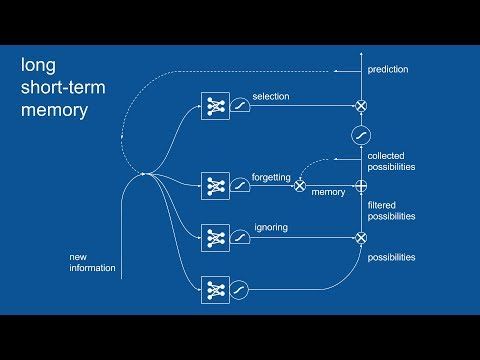

In [ ]:
YouTubeVideo("WCUNPb-5EYI", width=800, height=500)

The most common type of RNN is the Long Short-Term Memory (LSTM) network, which is designed to better handle long-term dependencies and avoid the problem of vanishing gradients that can occur in traditional RNNs.

Unlike traditional RNNs, which can suffer from the vanishing gradient problem, where the gradients become very small or disappear as they are propagated through the network, LSTM networks use a special **memory cell** that allows them to maintain information over longer periods of time.

In an LSTM network, the memory cell is connected to three gates: the **input gate**, the **forget gate**, and the **output gate**. The input gate controls whether new information should be added to the memory cell, the forget gate controls whether existing information should be forgotten, and the output gate controls whether the information in the memory cell should be used to produce an output.

During the forward pass, the input sequence is fed into the network, and the memory cell is updated based on the input, the previous output, and the gates. During the backward pass, the error is backpropagated through time, and the weights of the network are updated to minimize the error.

LSTM networks have been shown to be effective for a wide range of tasks that involve sequential data, such as language modeling, speech recognition, machine translation, and image captioning. They have become a popular choice for processing sequential data and have been used in many practical applications.

### 1.4 Approaching the problem from both ends - the bidirectional LSTM

A bidirectional Long Short-Term Memory (LSTM) network is a type of Recurrent Neural Network (RNN) that processes input sequences in both forward and backward directions. In other words, the network has two sets of hidden layers, one that processes the sequence in the forward direction and another that processes it in the backward direction.

The outputs of both sets of hidden layers are combined to produce the final output of the network. By processing the input sequence in both directions, the network is able to capture information from both past and future inputs, which can be useful for tasks that require context from both directions.

**Advantages:**

* Bidirectional LSTMs can capture dependencies in both directions, making them more effective in tasks where past and future inputs are important.
* They are able to learn more complex relationships in the data, leading to better accuracy in many tasks.
* They are widely used in natural language processing (NLP) tasks such as sentiment analysis, named entity recognition, and machine translation.

**Disadvantages:**

* Bidirectional LSTMs are computationally more expensive and require more memory compared to traditional LSTMs.
* They can be more difficult to train and require more data to prevent overfitting.
* They are not suitable for tasks where the entire input sequence is not available at once, such as real-time processing or streaming data.

## 2 Coding example - RNNs for text classification

This text classification tutorial trains a [recurrent neural network](https://developers.google.com/machine-learning/glossary/#recurrent_neural_network) on the [IMDB large movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/) for sentiment analysis. The following sections have been adapted from this [tutorial](https://www.tensorflow.org/text/tutorials/text_classification_rnn) on the official TensorFlow website.

### 2.1 Setup

In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

Import `matplotlib` and create a helper function to plot graphs:

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

### 2.2 Setup input pipeline


The IMDB large movie review dataset is a *binary classification* dataset—all the reviews have either a *positive* or *negative* sentiment.

Download the dataset using [TFDS](https://www.tensorflow.org/datasets). See the [loading text tutorial](https://www.tensorflow.org/tutorials/load_data/text) for details on how to load this sort of data manually.


In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Initially this returns a dataset of (text, label pairs):

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


Next shuffle the data for training and create batches of these `(text, label)` pairs:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"i cannot believe i wasted 80 minutes of my life watching this terrible film i kept hoping it was going to get better by the end but boy was I wrong. The plot was abysmal , the acting was extremely poor and the special effects were awful. Not even the 2 beautiful girls could revive my interest in this boring and bloody mess. However i cannot lie ,some of the lines in this film were quite memorable such as when the Asian boy says '' i lost my virginity to the babysitter so f**** stereotypes ''<br /><br />please do not waste your time with this crash unless u are prepared or want to have a good laugh .. maybe that way u can watch it to rip this movie with some mates"
 b'It wasn\'t the most pointless animation film experience ever, but it certainly can\'t be admired as much as it tries to be good. Combining Dreamworks animation and computer graphics, this is the story of a mustang, later named Spirit (Matt Damon, providing the first person narration), and his journey through acr

### 2.3 Create the text encoder

The raw text loaded by `tfds` needs to be processed before it can be used in a model. The simplest way to process text for training is using the `TextVectorization` layer. This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's `.adapt` method:

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


The `.adapt` method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency: 

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed `output_sequence_length`):

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 10, 543, 256, ...,   0,   0,   0],
       [  9, 268,   2, ...,   0,   0,   0],
       [ 10,  41, 208, ...,   0,   0,   0]])

With the default settings, the process is not completely reversible. There are three main reasons for that:

1. The default value for `preprocessing.TextVectorization`'s `standardize` argument is `"lower_and_strip_punctuation"`.
2. The limited vocabulary size and lack of character-based fallback results in some unknown tokens.

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"i cannot believe i wasted 80 minutes of my life watching this terrible film i kept hoping it was going to get better by the end but boy was I wrong. The plot was abysmal , the acting was extremely poor and the special effects were awful. Not even the 2 beautiful girls could revive my interest in this boring and bloody mess. However i cannot lie ,some of the lines in this film were quite memorable such as when the Asian boy says '' i lost my virginity to the babysitter so f**** stereotypes ''<br /><br />please do not waste your time with this crash unless u are prepared or want to have a good laugh .. maybe that way u can watch it to rip this movie with some mates"
Round-trip:  i cannot believe i [UNK] [UNK] minutes of my life watching this terrible film i kept [UNK] it was going to get better by the end but boy was i wrong the plot was [UNK] the acting was extremely poor and the special effects were awful not even the 2 beautiful girls could [UNK] my interest in this borin

### 2.4 Create the model

![A drawing of the information flow in the model](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/bidirectional.png?raw=1)

Above is a diagram of the model. 

1. This model can be build as a `tf.keras.Sequential`.

2. The first layer is the `encoder`, which converts the text to a sequence of token indices.

3. After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

  This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a `tf.keras.layers.Dense` layer.

4. A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

  The `tf.keras.layers.Bidirectional` wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output. 

  * The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.  

  * The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

5. After the RNN has converted the sequence to a single vector the two `layers.Dense` do some final processing, and convert from this vector representation to a single logit as the classification output. 


The code to implement this is below:

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Please note that Keras sequential model is used here since all the layers in the model only have single input and produce single output. In case you want to use stateful RNN layer, you might want to build your model with Keras functional API or model subclassing so that you can retrieve and reuse the RNN layer states. Please check [Keras RNN guide](https://www.tensorflow.org/guide/keras/rnn#rnn_state_reuse) for more details.

The embedding layer [uses masking](https://www.tensorflow.org/guide/keras/masking_and_padding) to handle the varying sequence-lengths. All the layers after the `Embedding` support masking:

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


To confirm that this works as expected, evaluate a sentence twice. First, alone so there's no padding to mask:

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 6s 6s/step
[-0.0001117]


Now, evaluate it again in a batch with a longer sentence. The result should be identical:

In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 70ms/step
[-0.0001117]


Compile the Keras model to configure the training process:

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### 2.5 Train the model

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 62s 129ms/step - loss: 0.6416 - accuracy: 0.5784 - val_loss: 0.4824 - val_accuracy: 0.7708
Epoch 2/10
391/391 [==============================] - 39s 98ms/step - loss: 0.4084 - accuracy: 0.8152 - val_loss: 0.3688 - val_accuracy: 0.8328
Epoch 3/10
391/391 [==============================] - 35s 89ms/step - loss: 0.3409 - accuracy: 0.8491 - val_loss: 0.3460 - val_accuracy: 0.8500
Epoch 4/10
391/391 [==============================] - 31s 79ms/step - loss: 0.3226 - accuracy: 0.8590 - val_loss: 0.3335 - val_accuracy: 0.8484
Epoch 5/10
391/391 [==============================] - 30s 77ms/step - loss: 0.3163 - accuracy: 0.8628 - val_loss: 0.3263 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 35s 89ms/step - loss: 0.3122 - accuracy: 0.8659 - val_loss: 0.3273 - val_accuracy: 0.8531
Epoch 7/10
391/391 [==============================] - 38s 97ms/step - loss: 0.3065 - accuracy: 0.8666 - val_loss: 0.3265 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 51ms/step - loss: 0.3212 - accuracy: 0.8593
Test Loss: 0.32121241092681885
Test Accuracy: 0.859279990196228


(0.0, 0.6586782157421112)

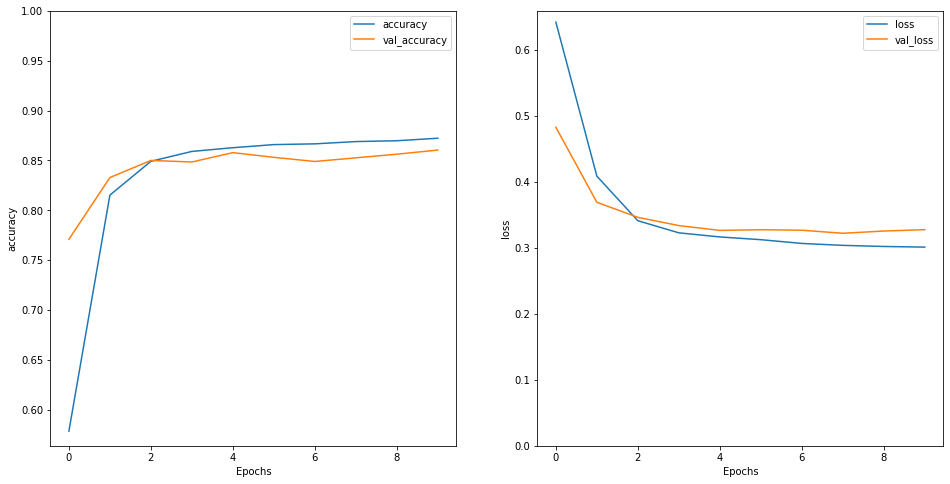

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Run a prediction on a new sentence:

If the prediction is >= 0.0, it is positive else it is negative.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 3s 3s/step


### 2.6 Stack two or more LSTM layers

Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

* If `False` it returns only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). This is the default, used in the previous model.

* If `True` the full sequences of successive outputs for each timestep is returned (a 3D tensor of shape `(batch_size, timesteps, output_features)`).

Here is what the flow of information looks like with `return_sequences=True`:

![layered_bidirectional](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/layered_bidirectional.png?raw=1)

The interesting thing about using an `RNN` with `return_sequences=True` is that the output still has 3-axes, like the input, so it can be passed to another RNN layer, like this:

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 90s 180ms/step - loss: 0.6020 - accuracy: 0.6241 - val_loss: 0.4219 - val_accuracy: 0.8120
Epoch 2/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3836 - accuracy: 0.8328 - val_loss: 0.3510 - val_accuracy: 0.8453
Epoch 3/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3441 - accuracy: 0.8516 - val_loss: 0.3362 - val_accuracy: 0.8458
Epoch 4/10
391/391 [==============================] - 56s 142ms/step - loss: 0.3195 - accuracy: 0.8656 - val_loss: 0.3328 - val_accuracy: 0.8583
Epoch 5/10
391/391 [==============================] - 54s 139ms/step - loss: 0.3106 - accuracy: 0.8676 - val_loss: 0.3242 - val_accuracy: 0.8573
Epoch 6/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3033 - accuracy: 0.8704 - val_loss: 0.3378 - val_accuracy: 0.8599
Epoch 7/10
391/391 [==============================] - 56s 142ms/step - loss: 0.2995 - accuracy: 0.8739 - val_loss: 0.3229 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 22s 57ms/step - loss: 0.3136 - accuracy: 0.8624
Test Loss: 0.3135535418987274
Test Accuracy: 0.8623999953269958


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 6s 6s/step
[[-1.9577184]]


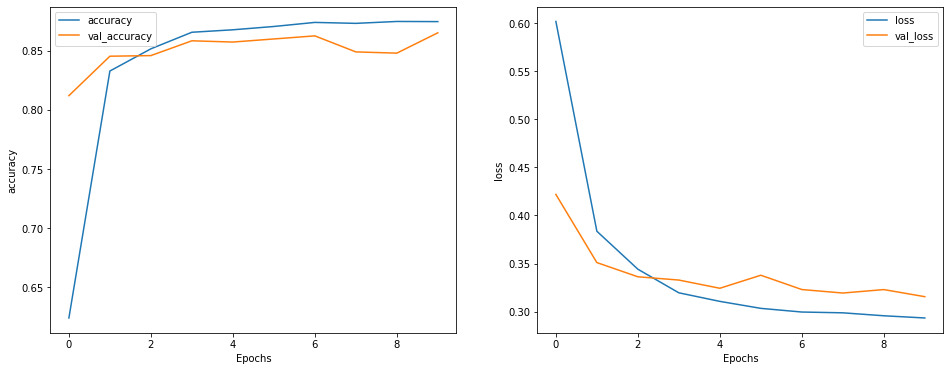

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

Check out other existing recurrent layers such as [GRU layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

If you're interested in building custom RNNs, see the [Keras RNN Guide](https://www.tensorflow.org/guide/keras/rnn).


## 3 *(Optional)* Exercise in RNNs for text classification

Use the knowledge you have gained in this notebook to classify the [SMS SPAM Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset). The dataset contains 5,574 messages, tagged acording being ham (legitimate) or spam.

In [ ]:
import pandas as pd

spam_df = pd.read_csv("spam.csv", encoding = "ISO-8859-1", engine = "python")

spam_df = spam_df[["v1", "v2"]]
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The data is in the column v2, and the labels (spam or ham) are in the column v1.

**Question 1:** Use a dense (non recursive) neural network, with an embedding layer to perform the classification, as in the "word embeddings" notebook. Use a bit of trial and error or the Keras hypertuner to improve your results. What is the highest accuracy you can achieve?

In [ ]:
# Your code here

# Importing a bunch of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

We will convert the pandas dataframe into a TF dataset. To do so, we can use the function ` tf.data.Dataset.from_tensor_slices`.

In [ ]:
# Encode the labels in 'v1' as binary (1 for spam, 0 for ham)
spam_df['v1'] = spam_df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
spam_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataframe into training and validation data
train_df, val_df = train_test_split(spam_df, test_size=0.2, random_state=42, stratify=spam_df['v1'])

# Convert the dataframes into TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_df['v2'].values, train_df['v1'].values))
val_ds = tf.data.Dataset.from_tensor_slices((val_df['v2'].values, val_df['v1'].values))

In [ ]:
# Shuffle and batch the training dataset
buffer_size = len(train_df)
batch_size = 32
train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')

# Set up the text vectorization layer
vocab_size = 10000
sequence_length = 250
vectorize_layer = TextVectorization(max_tokens=vocab_size, standardize=custom_standardization, output_mode='int', output_sequence_length=sequence_length)

# Adapt the text vectorization layer to the training data
vectorize_layer.adapt(train_ds.map(lambda text, label: text))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# Create embedding layer

embedding_dim = 100 # Hyperparameter
embedding_layer = Embedding(vocab_size, embedding_dim)

# Build model
dense_model = Sequential([
  vectorize_layer,
  embedding_layer,
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(1)
])

# Compile model
dense_model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [ ]:
# Train the model on the dataset

epochs = 10
history = dense_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
140/140 [==============================] - 20s 109ms/step - loss: 0.4592 - accuracy: 0.8658 - val_loss: 0.3773 - val_accuracy: 0.8664
Epoch 2/10
140/140 [==============================] - 6s 45ms/step - loss: 0.3688 - accuracy: 0.8658 - val_loss: 0.3589 - val_accuracy: 0.8664
Epoch 3/10
140/140 [==============================] - 3s 23ms/step - loss: 0.3403 - accuracy: 0.8658 - val_loss: 0.3191 - val_accuracy: 0.8664
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.2713 - accuracy: 0.8658 - val_loss: 0.2240 - val_accuracy: 0.8664
Epoch 5/10
140/140 [==============================] - 2s 14ms/step - loss: 0.1671 - accuracy: 0.8972 - val_loss: 0.1421 - val_accuracy: 0.9309
Epoch 6/10
140/140 [==============================] - 2s 14ms/step - loss: 0.1000 - accuracy: 0.9637 - val_loss: 0.0985 - val_accuracy: 0.9623
Epoch 7/10
140/140 [==============================] - 2s 17ms/step - loss: 0.0678 - accuracy: 0.9767 - val_loss: 0.0805 - val_accuracy: 0.97

In [ ]:
test_ds = ["Congratulations! You have won a $1000 gift card. Click the link to claim your prize: www.spamwebsite.com",
           "URGENT! Your bank account has been compromised. Call us immediately at +1 800-FAKE-NUM to secure your account.",
           "Get 50% off on all products! Exclusive offer, only for today. Visit www.shop-spam-now.com and use code SPAM50 at checkout.",
           "Hey, it was great catching up with you today. Let's meet again soon!",
           "Don't forget to pick up milk and eggs on your way home from work.",
           "Hi, this is Dr. Smith's office. Your appointment is scheduled for tomorrow at 2 pm. Please arrive 10 minutes early."]

In [ ]:
preds = dense_model.predict(test_ds)

1/1 [==============================] - 0s 139ms/step


In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

pred_results = sigmoid(preds) # Expected result: [1, 1, 1, 0, 0, 0]
pred_categories = ["spam" if x > 0.5 else "ham" for x in pred_results]

pred_categories # Expected result: [spam, spam, spam, ham, ham, ham]

['spam', 'spam', 'ham', 'ham', 'ham', 'ham']

**Question 2:** Use a pre-trained embedding (you can look into GloVe or Word2Vec embedding. Freeze the embedding weights, and try using this embedding layer in your model above, instead of starting from an untrained embedding. What accuracy do you achieve?

In [ ]:
# Your code here

# Download GloVe embeddings:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-03-28 10:34:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-28 10:34:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-28 10:34:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Get the 100 dimension word embeddings

path_to_glove_file = "./glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Prepare the embedding matrix

vocab = vectorize_layer.get_vocabulary()
word_index = dict(zip(vocab, range(len(vocab))))

num_tokens = len(vocab) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 5774 words (2686 misses)


In [ ]:
# Make the embedding layer

glove_embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
glove_based_model = Sequential([vectorize_layer,
                                glove_embedding_layer,
                                GlobalAveragePooling1D(),
                                Dense(32, activation='relu'),
                                Dense(1)
                                ])

# Compile
glove_based_model.compile(optimizer='adam',
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=['accuracy'])

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train
epochs = 50
history = glove_based_model.fit(train_ds,
                                validation_data=val_ds,
                                epochs=epochs,
                                callbacks=[stop_early])

Epoch 1/50
140/140 [==============================] - 2s 5ms/step - loss: 0.4960 - accuracy: 0.8658 - val_loss: 0.4052 - val_accuracy: 0.8664
Epoch 2/50
140/140 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8658 - val_loss: 0.3297 - val_accuracy: 0.8664
Epoch 3/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2939 - accuracy: 0.8658 - val_loss: 0.2637 - val_accuracy: 0.8717
Epoch 4/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2374 - accuracy: 0.8797 - val_loss: 0.2214 - val_accuracy: 0.8861
Epoch 5/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2020 - accuracy: 0.9017 - val_loss: 0.1937 - val_accuracy: 0.9058
Epoch 6/50
140/140 [==============================] - 1s 4ms/step - loss: 0.1798 - accuracy: 0.9163 - val_loss: 0.1767 - val_accuracy: 0.9193
Epoch 7/50
140/140 [==============================] - 1s 4ms/step - loss: 0.1647 - accuracy: 0.9271 - val_loss: 0.1644 - val_accuracy: 0.9327
Epoch 

In [ ]:
preds = glove_based_model.predict(test_ds)

pred_results = sigmoid(preds) # Expected result: [1, 1, 1, 0, 0, 0]
pred_categories = ["spam" if x > 0.5 else "ham" for x in pred_results]

pred_categories # Expected result: [spam, spam, spam, ham, ham, ham]

1/1 [==============================] - 0s 110ms/step


['spam', 'spam', 'spam', 'ham', 'ham', 'ham']

**Question 3:** Now instead of a fully dense network, use a single **unidirectional** LSTM layer after the embedding layer. Note the highest accuracy you can reach.

In [ ]:
# Your code here

del(embedding_layer) # Remove the previously trained embedding layer

# Make new embedding layer with masking
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)

# Build model
lstm_model = Sequential([vectorize_layer,
                         embedding_layer,
                         layers.LSTM(64),
                         Dense(32, activation='relu'),
                         Dense(1)
                         ])

# Compile
lstm_model.compile(optimizer='adam',
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=['accuracy'])

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train
epochs = 50
history = lstm_model.fit(train_ds,
                                validation_data=val_ds,
                                epochs=epochs,
                                callbacks=[stop_early])



Epoch 1/50
140/140 [==============================] - 30s 126ms/step - loss: 0.2525 - accuracy: 0.9204 - val_loss: 0.0682 - val_accuracy: 0.9803
Epoch 2/50
140/140 [==============================] - 7s 49ms/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0603 - val_accuracy: 0.9839
Epoch 3/50
140/140 [==============================] - 5s 38ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0612 - val_accuracy: 0.9821
Epoch 4/50
140/140 [==============================] - 8s 60ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0683 - val_accuracy: 0.9848
Epoch 5/50
140/140 [==============================] - 8s 60ms/step - loss: 6.4546e-04 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9848


**Question 4:** Same as question 3, but this time wrap the LSTM layer in a bidirectional wrapper. What is your max accuracy now?

In [ ]:
# Your code here

del(embedding_layer) # Remove the previously trained embedding layer

# Make new embedding layer with masking
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)

# Build model
bidirectional_lstm_model = Sequential([vectorize_layer,
                         embedding_layer,
                         layers.Bidirectional(layers.LSTM(64)),
                         Dense(32, activation='relu'),
                         Dense(1)
                         ])

# Compile
bidirectional_lstm_model.compile(optimizer='adam',
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=['accuracy'])

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train
epochs = 50
history = bidirectional_lstm_model.fit(train_ds,
                                validation_data=val_ds,
                                epochs=epochs,
                                callbacks=[stop_early])


**Question 5:** Same as question 4, but add one more bidirectional LSTM layer. What's the new max accuracy?

In [ ]:
# Your code here

# Your code here

del(embedding_layer) # Remove the previously trained embedding layer

# Make new embedding layer with masking
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)

# Build model
multilayer_lstm_model = Sequential([vectorize_layer,
                         embedding_layer,
                         layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                         layers.Bidirectional(layers.LSTM(64)),
                         Dense(32, activation='relu'),
                         Dense(1)
                         ])

# Compile
multilayer_lstm_model.compile(optimizer='adam',
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=['accuracy'])

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train
epochs = 50
history = multilayer_lstm_model.fit(train_ds,
                                validation_data=val_ds,
                                epochs=epochs,
                                callbacks=[stop_early])




**Question 6:** Feel free to experiment with more layers, bidirectionality, tune the hyperparameters, use regularization techniques etc. Get the highest possible accuracy you can.

In [ ]:
# Your code here



